In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

print(tf.__version__)

2023-08-07 21:12:22.776141: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-07 21:12:22.799237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 21:12:23.163410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1


In [2]:
train_df = pd.read_csv("../data/facial_keypoint_data/training.csv")
test_df = pd.read_csv("../data/facial_keypoint_data/test.csv")
submission_sample_df = pd.read_csv("../data/facial_keypoint_data/SampleSubmission.csv")

In [3]:
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
train_df.shape

(7049, 31)

In [5]:
test_df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [6]:
x_train = np.array(train_df['Image'].str.split(' ').to_numpy().tolist()).astype(float)
y_train = train_df.drop(columns='Image')
x_test = np.array(test_df['Image'].str.split(' ').to_numpy().tolist()).astype(float)

In [7]:
y_train

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447


In [8]:
mask_x = [bool((i+1)%2) for i in range(30) ]
mask_y = [bool(i%2) for i in range(30) ]

In [9]:
y_train.loc[:, mask_x]

,left_eye_center_x,right_eye_center_x,left_eye_inner_corner_x,left_eye_outer_corner_x,right_eye_inner_corner_x,right_eye_outer_corner_x,left_eyebrow_inner_end_x,left_eyebrow_outer_end_x,right_eyebrow_inner_end_x,right_eyebrow_outer_end_x,nose_tip_x,mouth_left_corner_x,mouth_right_corner_x,mouth_center_top_lip_x,mouth_center_bottom_lip_x
0,66.033564,30.227008,59.582075,73.130346,36.356571,23.452872,56.953263,80.227128,40.227609,16.356379,44.420571,61.195308,28.614496,43.312602,43.130707
1,64.332936,29.949277,58.856170,70.722723,36.034723,24.472511,53.987404,78.634213,42.728851,16.865362,48.206298,56.421447,35.122383,46.684596,45.467915
2,65.057053,30.903789,59.412000,70.984421,37.678105,24.976421,55.742526,78.887368,42.193895,16.791158,47.557263,60.822947,33.726316,47.274947,47.274947
3,65.225739,32.023096,60.003339,72.314713,37.618643,25.307270,56.433809,77.910261,41.671513,20.458017,51.885078,65.598887,37.245496,50.303165,51.561183
4,66.725301,32.244810,58.565890,72.515926,36.982380,22.506110,57.249571,77.762945,38.035436,15.925870,43.299534,60.671411,31.191755,44.962748,44.227141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,29.746749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.265961,NaN,NaN,NaN,50.426637
7045,66.134400,30.478626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.910346,NaN,NaN,NaN,50.287397
7046,66.690732,31.666420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,NaN,NaN,NaN,49.462572
7047,70.965082,30.543285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.754202,NaN,NaN,NaN,50.065186


In [10]:
y_train_x = y_train.loc[:, mask_x].to_numpy()
y_train_y = y_train.loc[:, mask_y].to_numpy()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7049, 9216)
(7049, 30)
(1783, 9216)


In [12]:
x_train /= 255.0
x_test /= 255.0

In [13]:
x_train = x_train.reshape(-1,96, 96, 1)
x_test = x_test.reshape(-1,96, 96, 1)

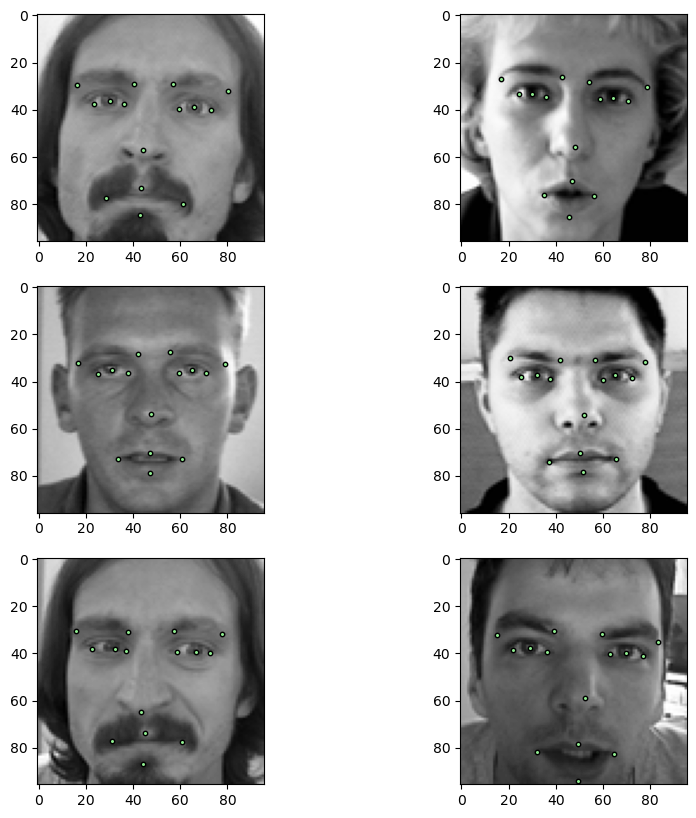

In [14]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.scatter(y_train_x[i], y_train_y[i],
            marker='o',
            s=10,
            c='lightgreen',
            edgecolors='black')
    
plt.show()

In [ ]:
# https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

In [15]:
model = keras.Sequential([
    
    # input = 96x96x1
    
    # 96 x 96 x 64
    keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(96, 96, 1)),
    keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'),
    # 48 x 48 x 64
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    # 48 x 48 x 128
    keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'),
    
    # 24 x 24 x 128
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    # 24 x 24 x 256
    keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'),
    
    # 12 x 12 x 256
    keras.layers.MaxPool2D((2, 2), padding='same'),

    # 12 x 12 x 256
    keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu'),
    
    # 6 x 6 x 256
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    # 6 x 6 x 4096 
    keras.layers.Conv2D(4096, (7, 7), strides=1, padding='same', activation='relu'),
     # 6 x 6 x 3
    keras.layers.Conv2D(3, (1, 1), strides=1, padding='same', activation='relu'),
    # 6 x 6 x 512
    keras.layers.Conv2DTranspose(512,4, (2, 2), padding="same", activation='relu'),
    
    keras.layers.BatchNormalization(),
    
    keras.layers.Concatenate()([skip[1], x])
    
   
    
])

NameError: name 'train' is not defined